In [65]:
###importaciones
###aquí se hacen las importaciones necesarias para entrenar y crear los modelos, cada uno cumple una función.
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import joblib
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import graphviz
import xgboost as xgb

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [66]:
##lectura del csv y objetos a usar
##Aquí se carga el archivo con los datos por medio de la librería Pandas, usando el comando read_csv, el cual es la extensión del archivo y a su vez se le agrega a una variable llamada data.
data=pd.read_csv('Historial_Caliente_Friocru_8.csv')
##Aquí de asignan los objetos como label encoder y el árbol de decisiones a una variable con un nombre más corto, con el fin de hacer la programación más amena. 
le=LabelEncoder()
dt=DecisionTreeClassifier()
##Aquí sólo se llama a la variable data y al eecutarlo se mostrará su contenido. 
data

,IdMaterial,CPRODTOOrigen,CCLASEPRODTOOrigen,ACEROOrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,...,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion,Pedido
0,1A300436GM100,MP500373,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,OK,1
1,1A287747GM100,MP500373,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK,1
2,1A291573GM100,MP500373,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK,1
3,1A294095GM100,MP500373,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK,1
4,1A294094GM100,MP500373,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,3A822949CM300,MP533977,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
8612,3A885651CM300,MP533977,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
8613,3A927257CM300,MP533977,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
8614,3A811774CM300,MP533977,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,OK,1


In [67]:
###limpieza de datos
##Se crea una variable "de" la cual será llamada cuando se use el comando drop
##ésta variable contiene las columnas que no se utilizarán en el analítico. 
de=['IdMaterial', 'CPRODTOOrigen', 'ACABSUPERDestino','Pedido']
##Se crea una nueva variable para datos, se mete la variable data pero se le aplica el comando drop
##el cual en conjunto con la variable de desecahrá las columnas que contiene la variable. 
datac=data.drop(de,axis=1)
datac

,CCLASEPRODTOOrigen,ACEROOrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,OK
1,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK
2,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK
3,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK
4,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
8612,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
8613,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
8614,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,OK


In [68]:
##Aquí se utiliza la función de pandas "dataframe" para convertir el csv a un dataframe de pandas.  
main_df=datac
main_df=pd.DataFrame(data=main_df)
print(main_df.head(10))

   CCLASEPRODTOOrigen ACEROOrigen BORDESOrigen  DIAM__INTERNOOrigen  \
0  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
1  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
2  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
3  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
4  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
5  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
6  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
7  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
8  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   
9  M-P-CALIENTE-BOB-_      C071TM   LAMINACION                  711   

                EXTREMOSOrigen                         NORMAOrigen  \
0  NO CORTADOS 98% EN ESPESOR.  TER \ 1006 BANDA LB (V 2011 REV 1)   
1  NO CORTADOS 98% EN ESPESOR.  TER \ 1006 BANDA LB (V 2011 REV 1)   
2  NO CO

In [69]:
## esto es solo para apoyarnos y sacar los nombres de las columnas.
main_df.columns

Index(['CCLASEPRODTOOrigen', 'ACEROOrigen', 'BORDESOrigen',
       'DIAM__INTERNOOrigen', 'EXTREMOSOrigen', 'NORMAOrigen',
       'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen', 'PLANITUDOrigen',
       'SOLDAOrigen', 'SUPERFICIEOrigen', 'USOGRALOrigen', 'CPRODTODestino',
       'CCLASEPRODTODestino', 'ACERODestino', 'BORDESDestino',
       'DIAM__INTERNODestino', 'EXTREMOSDestino', 'NORMADestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino', 'Reasignacion'],
      dtype='object')

In [70]:
## aquí se utiliza le, el cual es Label Encoder (objeto que se asignó en el segundo bloque)
##y este lo utilizamos para encodificar la variable objetivo, por lo cual OK y RECHAZADO se convierten a 1 y 0
##pero esto es sólo el entrenamiento de ese objeto, por eso sólo se usa el comando fit.
encobj=le.fit(main_df['Reasignacion'])

In [71]:
###codificación de variable objetivo usando LE
##aquí ya se utiliza el comando transform para hacer la codificación
main_df.Reasignacion=encobj.transform(main_df['Reasignacion'])
## al aplicarse sobre la misma variable que contenía el dataframe 
## obtenemos que la columna de Reasignación (variable objetivo) ahora está codificada en 1 y 0.
main_df

,CCLASEPRODTOOrigen,ACEROOrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,0
1,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,0
2,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,0
3,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,0
4,M-P-CALIENTE-BOB-_,C071TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1006 BANDA LB (V 2011 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. IND/AUT SIN MFG,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
8612,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
8613,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
8614,M-P-CALIENTE-BOB-_,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ 1010 \ REAPLICACION (V 2017 REV 1),TERNIUM -0.0/+50.0 MM,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,508,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568,1/2 ASTM A 568,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,GALVANIZADO,0


In [72]:
##Aquí se crea un .pkl (el cual es como un ejecutable) con el encodificado entrenado para un uso futuro. 
joblib.dump(encobj,'EncodificacionObjetivo.pkl')

['EncodificacionObjetivo.pkl']

In [73]:
###Variable objetivo
##aquí separamos la variable objetivo y creamos un data frame a partir de ella.
target_df = pd.DataFrame(main_df, columns=['Reasignacion'])
print(target_df.sample(10))

      Reasignacion
2984             0
5551             0
4912             0
1675             0
8540             0
3485             0
3547             0
2162             0
3661             0
3010             0


In [74]:
##creación de dataset encodificado
## Como ya se creo un data frame con la variable objetivo 
##ésta se eliminará del dataframe que contienen los datos para el analítico. 
main_df=main_df.drop(['Reasignacion'],axis=1)


In [75]:
####encodifiación de atributos usando target
##Ahora usando Target encoder, dentro de una variable llamada enc, encodificamos los datos del analítico
##introduciendo las columnas a codificar, poniendo los argumentos como handle_unknown 
##para que los valores desconocidos no sean un problema. 
##y al final se introduce el fit para entrenar al codificador con el main df como eje X (datos)
##y el target df como eje Y(objetivo).
main_df.columns = main_df.columns.str.strip()
target_df.columns = target_df.columns.str.strip()
enc=category_encoders.target_encoder.TargetEncoder(verbose=0,cols=['CCLASEPRODTOOrigen', 'ACEROOrigen', 'BORDESOrigen',
       'DIAM__INTERNOOrigen', 'EXTREMOSOrigen', 'NORMAOrigen',
       'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen', 'PLANITUDOrigen',
       'SOLDAOrigen', 'SUPERFICIEOrigen', 'USOGRALOrigen', 'CPRODTODestino',
       'CCLASEPRODTODestino', 'ACERODestino', 'BORDESDestino',
       'DIAM__INTERNODestino', 'EXTREMOSDestino', 'NORMADestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino']
                                                   ,drop_invariant=False, return_df=True, handle_unknown='value',handle_missing='value',min_samples_leaf=1,smoothing=1.0).fit(main_df,target_df)

In [76]:
##aquí se crea el primer pkl que necesitaremos en cada modelo, y es un pkl de la codificación de los datos de entrenamiento
##para utilizar la misma encodificación en cada análisis de nuevos datos.
joblib.dump(enc,'TargetCaliente_friocru.pkl')

['TargetCaliente_friocru.pkl']

In [77]:
##usamos la variable enc con el comando transform para codificar el maindf 
##y que los datos sean números, de tal forma que el algoritmo pueda entender todo.
codi=enc.transform(main_df)
codi

,CCLASEPRODTOOrigen,ACEROOrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.017583
1,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
2,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
3,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
4,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.014790
8612,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.014790
8613,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.014790
8614,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.017583


In [78]:
###declaración de variable x (atributos)
##aquí sólo se crea X con los datos ya convertidos.
X=codi
X

,CCLASEPRODTOOrigen,ACEROOrigen,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.017583
1,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
2,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
3,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
4,0.041783,9.868421e-03,0.041783,0.041826,0.041473,3.484321e-03,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.034146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.014790
8612,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.014790
8613,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.014790
8614,0.041783,6.978310e-07,0.041783,0.041826,0.041473,3.474351e-08,0.003311,0.04172,0.041473,0.041783,...,0.041783,0.041783,0.041783,0.005961,0.043764,0.041783,0.041783,0.041783,0.032812,0.017583


In [79]:
###declaración de y (objetivo)
##Aquí se crea Y con los datos objetivo codificados.
y=target_df
y

,Reasignacion
0,0
1,0
2,0
3,0
4,0
...,...
8611,0
8612,0
8613,0
8614,0


In [80]:
##división de datos 
##Se utiliza la función train_test_split con las variables anteriormente creadas(X,y) para hacer una división aleatoria de los datos de tal forma que unos se usen para apreder y otros para hacer una especie de examen y comprobar que tan bien aprendió el modelo
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [81]:
##entrenamiento
##se utiliza la variable dt (el arbol de decisiones) con el comando fit para entrenarlo, usando X_train & y_train.
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
dt.score(X_train,y_train)

1.0

In [83]:
###prueba score
##Se prueba el aprendizaje del modelo con la función score y las variables X_test & y_test (Examen)
dt.score(X_test,y_test)

0.9986072423398329

In [84]:
##Para finalizar se crea el segundo PKL que se usará en cada modelo, y éste es el pkl del árbol de decisiones ya entrenado en éste proceso de reasignación. de tal manera que por cada proceso de reasignación tendremos 2 pkl, uno para encodificar y otro para analizar los datos y hacer las predicciones. 
joblib.dump(dt,'ModeloCaliente_friocru.pkl')

['ModeloCaliente_friocru.pkl']

In [85]:
##Se crea una variable con los nombres de las variables objetivo
nombres=['OK','RECHAZADO']

In [86]:
##exportación y render
##Usando graphviz  podemos exportar el modelo que creamos como un pdf para así visualizarlo, esto es un paso extra y no es necesario para crear o modificar el modelo, sin embargo, te da una perspectiva de qué se creó. 
dot_data=export_graphviz(dt,feature_names= X.columns, class_names=nombres, impurity=False, filled=True)
graph=graphviz.Source(dot_data)

graph.render('ModeloCaliente_friocru')

'ModeloCaliente_friocru.pdf'

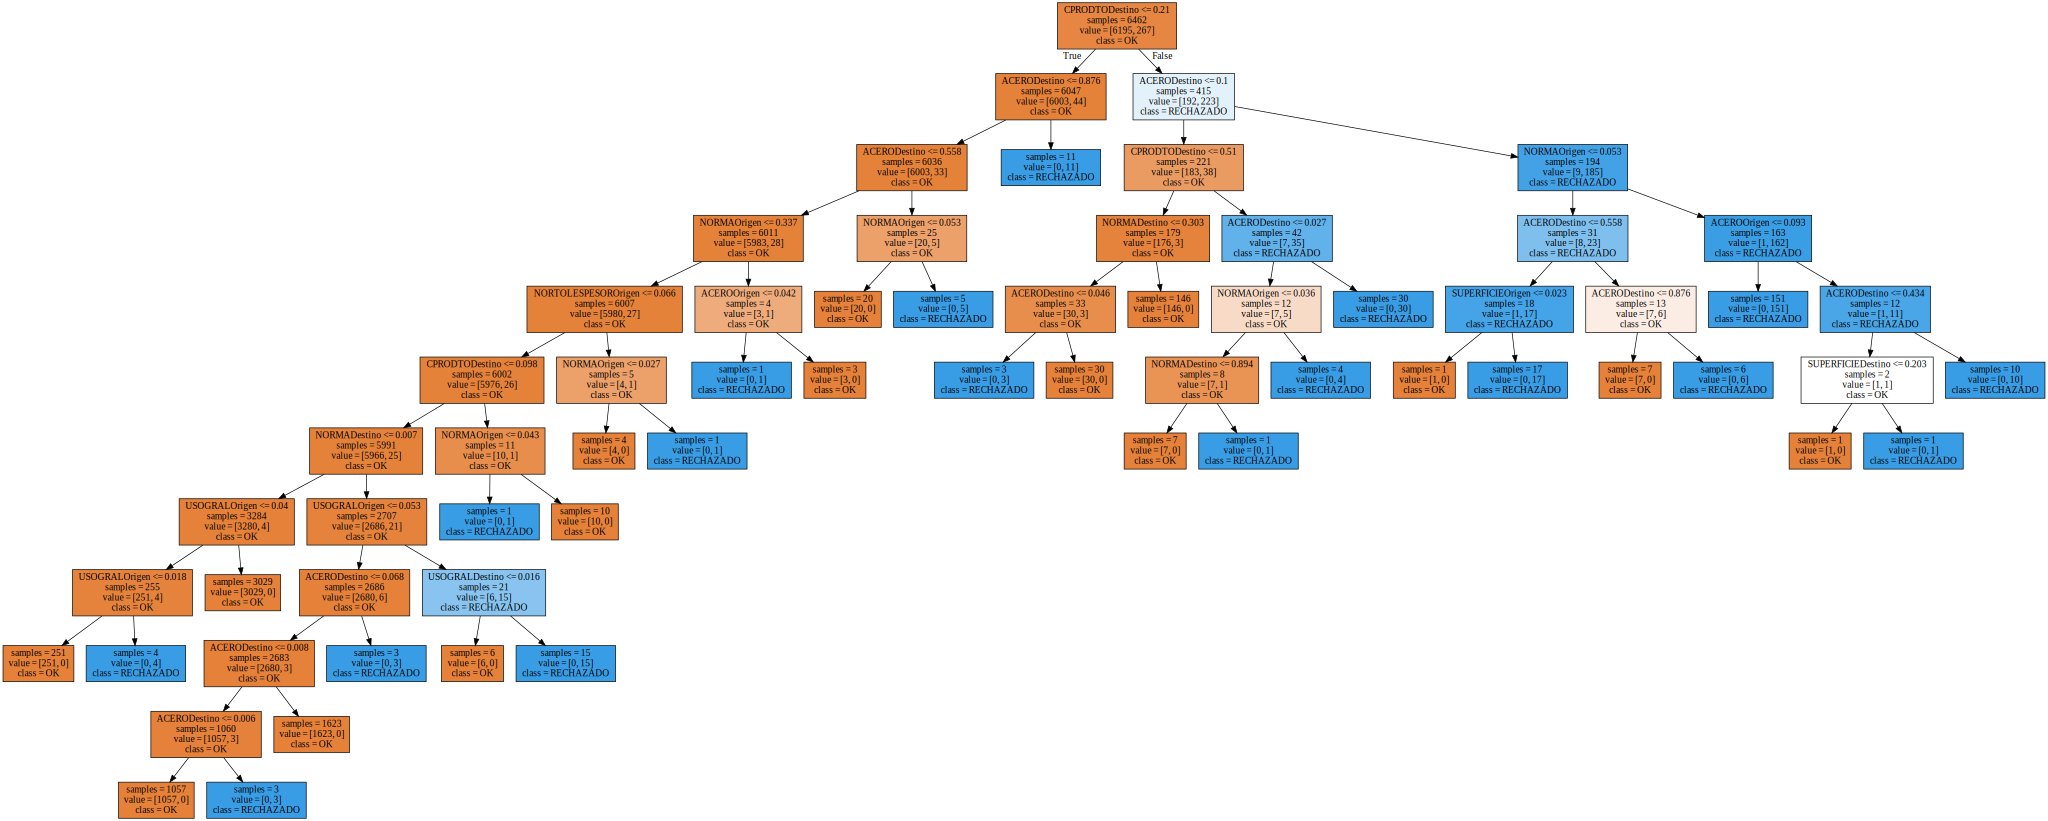

In [87]:
graphviz.Source(dot_data)

Text(0.5, 0, 'Importancia')

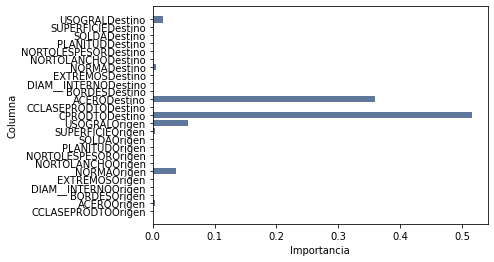

In [88]:
carac=main_df.shape[1]
plt.barh(range(carac),dt.feature_importances_)
plt.yticks(np.arange(carac),X.columns)
plt.ylabel('Columna')
plt.xlabel('Importancia')

In [89]:
# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, 
                        target_df, random_state=1)

# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.992/0.990


In [90]:
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [91]:
# Imprimir la precisión.
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  1.000/0.998


In [92]:
# Armando el modelo con parametro max_depth
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
# Ajustando el modelo
gbrt.fit(X_train, y_train)
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Precisión Gradient Boosting train/test  0.991/0.987
